In [2]:
import numpy as np
from numpy import  random
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
mnist = keras.datasets.mnist

In [3]:
class Layer:
    def __init__(self,inputs,no_of_neurons):
        # random.seed(10)
        self.lamda = 0.01
        self.weights = random.randn(no_of_neurons,inputs)
        self.dwo = np.zeros(self.weights.shape)
    def feedforward(self,inputs):
        self.input = inputs
        self.output = np.dot(inputs, np.array(self.weights).T)
    def activationRelu(self,inputs):
        self.activationoutput = np.maximum(0,inputs)
    def sigmoid(self,inputs):
        self.sigmoidoutput = 1/(1+np.exp(-inputs))
    def backpropogate(self,Y):
        y = self.sigmoidoutput
        self.do = y*(1-y)*(Y-y)  #deltaoutput
        # update weights with momentum
        self.dwo = 0.9*self.dwo + np.dot(self.do.T,self.input)
        self.previousweights = self.weights
        # self.weights = self.weights+0.01*self.dwo
        self.weights = self.weights+ 0.01*self.dwo-(2*self.lamda*np.sign(self.weights)) 
    def backpropogatelayers(self,Y,we):
        y=self.sigmoidoutput
        x = y*(1-y)
        self.do = np.dot(Y,we )*x # delta backpropagated
        self.dwo = 0.9 * self.dwo + np.dot(self.do.T, self.input)
        self.previousweights = self.weights
        self.weights = self.weights + 0.01*self.dwo -(2*self.lamda*np.sign(self.weights))
        # self.weights = self.weights + 0.01 * self.dwo


In [4]:
class Model:
    def fit_predict(self,x_train,y_train,epoch,x_test,y_test):
        l1 = Layer(784, 512)
        l2 = Layer(512, 256)
        l3 = Layer(256, 98)
        l4 = Layer(98, 49)
        l5 = Layer(49, 24)
        l6 = Layer(24, 10)
        l7 = Layer(10, 6)
        layers = [l1, l2, l3, l4, l5, l6, l7]
        train_error = []
        test_error = []
        for i in range(epoch):
            l1.feedforward(x_train)
            l1.sigmoid(l1.output)
            for i in range(1, len(layers)):
                layers[i].feedforward(layers[i - 1].sigmoidoutput)
                layers[i].sigmoid(layers[i].output)
            error = np.sum(np.abs(y_train - l7.sigmoidoutput))
            train_error.append(error/(x_train.shape[0]))
            print(error/(x_train.shape[0]),"train error")
            l7.backpropogate(y_train)
            for i in range(len(layers)-1,0):
                layers[i].backpropogatelayers(layers[i+1].do,layers[i+1].previousweights)
            l1.feedforward(x_test)
            l1.sigmoid(l1.output)
            for i in range(1, len(layers)):
                layers[i].feedforward(layers[i - 1].sigmoidoutput)
                layers[i].sigmoid(layers[i].output)
            error1 = np.sum(np.abs(y_test - l7.sigmoidoutput))
            print(error1/(x_test.shape[0]), "test error")
            test_error.append(error1/(x_test.shape[0]))
        return train_error,test_error


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

y_train = y_train.reshape(60000,1)
y_train=y_train+48
outputsize = 6
y_train =(((y_train[:,None] & (1 << np.arange(outputsize)))) > 0).astype(int)
y_train= y_train.reshape(60000,6)

y_test = y_test.reshape(10000,1)
y_test=y_test+48
y_test =(((y_test[:,None] & (1 << np.arange(outputsize)))) > 0).astype(int)
y_test= y_test.reshape(10000,6)

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
m = Model()
epoch = 10
train,test=m.fit_predict(x_train[:8000],y_train[:8000],epoch,x_test[:10],y_test[:10])

3.0188682141229006 train error
2.475052037663269 test error
2.1690656204164607 train error
1.6375838556401177 test error
1.5798417120847585 train error
1.4000869144058086 test error
1.5021531686408593 train error
1.4000000499027783 test error
1.5021250154453518 train error
1.400000000061811 test error
1.5021250000187545 train error
1.400000000000155 test error
1.502125000000048 train error
1.4000000000000008 test error
1.502125 train error
1.4 test error
1.502125 train error
1.4 test error
1.502125 train error
1.4 test error


Text(0, 0.5, 'error')

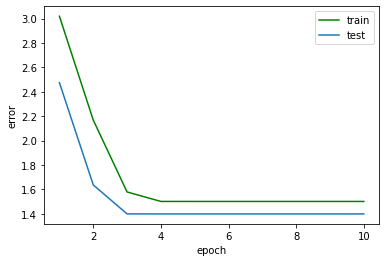

In [9]:
xaxis = []
for i in range(epoch):
    xaxis.append(i+1)
plt.plot(xaxis,train,'g',label="train")
plt.plot(xaxis,test,label="test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")